<a href="https://colab.research.google.com/github/DSJR741221/DSJackieR/blob/main/DS_C3_SC1_Jacqueline_G_Richard_Rodriguez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**DS_C3_SC1 - PLATAFORMAS DE VISUALIZACIÓN**

---

**Reto: Explorando el índice de felicidad**

NOMBRE DEL PARTICIPANTE: Jacqueline Gabriela Richard Rodríguez

1.	Genera una libreta en Google Colab para el reto, cuya estructura esté basada en los análisis solicitados.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

2.	Descarga el archivo: happiness_report.csv y guarda, en un dataframe (`happiness`), todos sus registros.

In [ ]:
df1 = pd.read_csv("/content/sample_data/Happiness_report.csv")

3.	A partir del dataframe happiness obtén otro (`mexico`) donde sólo almacenes la información de México. Haz que la columna `Country or region` quede como índice.

In [ ]:
df1 = pd.read_csv("/content/sample_data/Happiness_report.csv")

# Filtrar las filas donde la columna 'Country or region' sea 'Mexico'
df2 = df1[df1['Country or region'] == 'Mexico']

# Establecer la columna 'Country or region' como índice
df2.set_index('Country or region', inplace=True)

print('Tamaño del resultado: ',df2.shape)
df2.head()

Tamaño del resultado:  (1, 8)


,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Country or region,,,,,,,,
Mexico,23,6.595,1.07,1.323,0.861,0.433,0.074,0.073


4.	Obtén un histograma del puntaje (`score`) para identificar el rango o clase más frecuente. Ubica el valor de México con una etiqueta de texto.

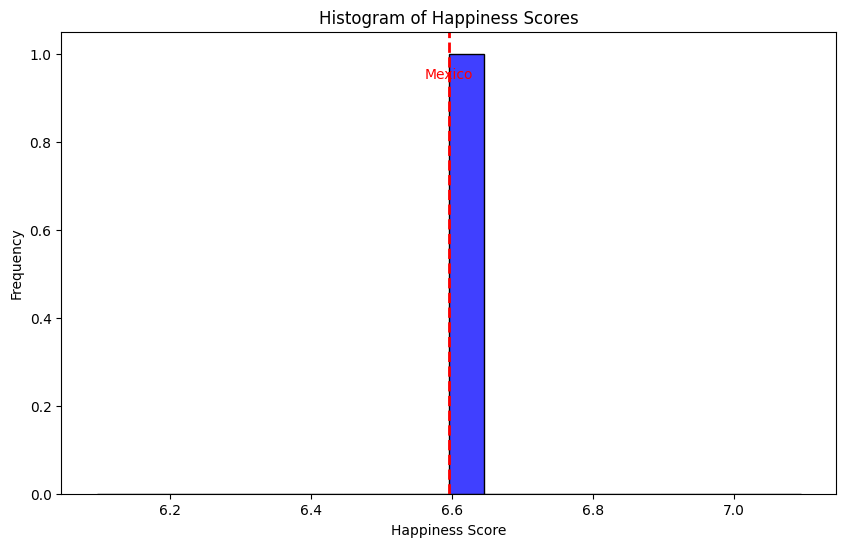

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrar la información de México y establecer el índice
df2 = df1[df1['Country or region'] == 'Mexico']
df2.set_index('Country or region', inplace=True)

# Crear el histograma del puntaje (score)
plt.figure(figsize=(10, 6))
sns.histplot(df2['Score'], bins=20, kde=False, color='blue')

# Obtener el valor del puntaje de México
df2_score = df2['Score'].values[0]

# Agregar una línea vertical y una etiqueta para el puntaje de México
plt.axvline(df2_score, color='red', linestyle='--', linewidth=2)
plt.text(df2_score, plt.ylim()[1]*0.9, 'Mexico', color='red', ha='center')

# Títulos y etiquetas
plt.title('Histogram of Happiness Scores')
plt.xlabel('Happiness Score')
plt.ylabel('Frequency')

# Mostrar la gráfica
plt.show()

*5*.	Construye un box plot para la columna esperanza de vida (`Healthy life expectancy`). Ubica el valor de México con una anotación.

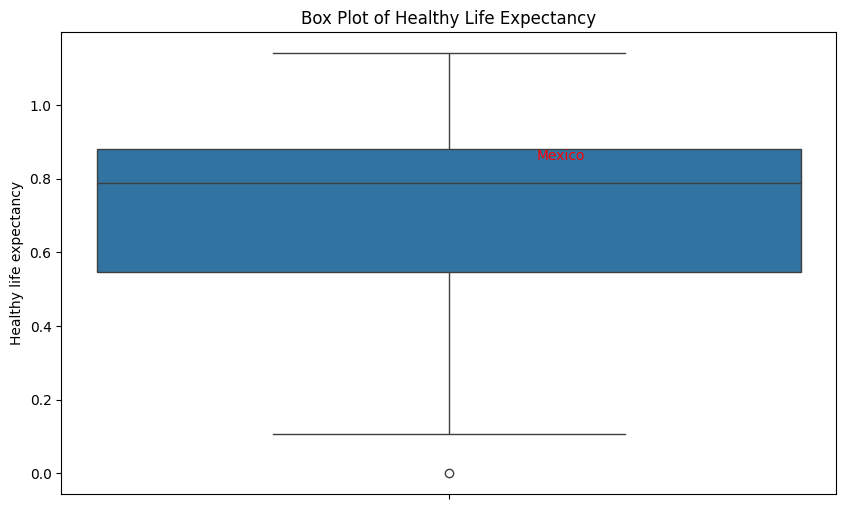

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrar la información de México
df2 = df1[df1['Country or region'] == 'Mexico']

# Crear el box plot para la columna 'Healthy life expectancy'
plt.figure(figsize=(10, 6))
sns.boxplot(y=df1['Healthy life expectancy'])

# Obtener el valor de 'Healthy life expectancy' de México
mexico_life_expectancy = df2['Healthy life expectancy'].values[0]

# Agregar una anotación para el valor de México
plt.scatter(y=mexico_life_expectancy, x=[0], color='red')
plt.text(x=0.1,y= mexico_life_expectancy, s='Mexico', color='red', ha='left', va='center')

# Títulos y etiquetas
plt.title('Box Plot of Healthy Life Expectancy')
plt.ylabel('Healthy life expectancy')

# Mostrar la gráfica
plt.show()


6.	Crea una gráfico circular para analizar en qué medida los factores contribuyen a evaluar la felicidad en México. Para ello, deberás modificar la estructura del dataframe `mexico` obtenido anteriormente.

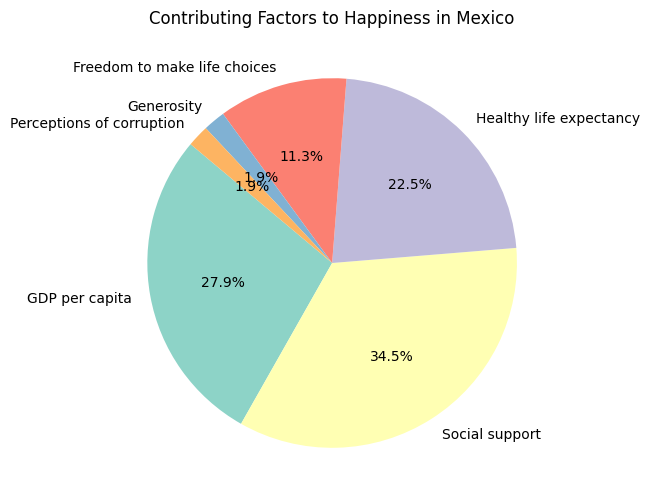

In [ ]:
import matplotlib.pyplot as plt

# Asumimos que las siguientes columnas son los factores que contribuyen a la felicidad
factors = [
    'GDP per capita',
    'Social support',
    'Healthy life expectancy',
    'Freedom to make life choices',
    'Generosity',
    'Perceptions of corruption'
]

# Extraer los valores de estos factores para México
mexico_factors = df2[factors].T  # Transponer para facilitar la creación del pie chart
mexico_factors.columns = ['Value']

# Crear el gráfico circular
plt.figure(figsize=(10, 6))
plt.pie(
    mexico_factors['Value'],
    labels=mexico_factors.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=sns.color_palette('Set3', len(factors))
)

# Título del gráfico
plt.title('Contributing Factors to Happiness in Mexico')

# Mostrar el gráfico
plt.show()


7.	Filtra el dataframe para quedarte con 5 países (el más feliz, el menos feliz, México y dos más de tu interés) y visualiza en una misma gráfica los 6 factores.

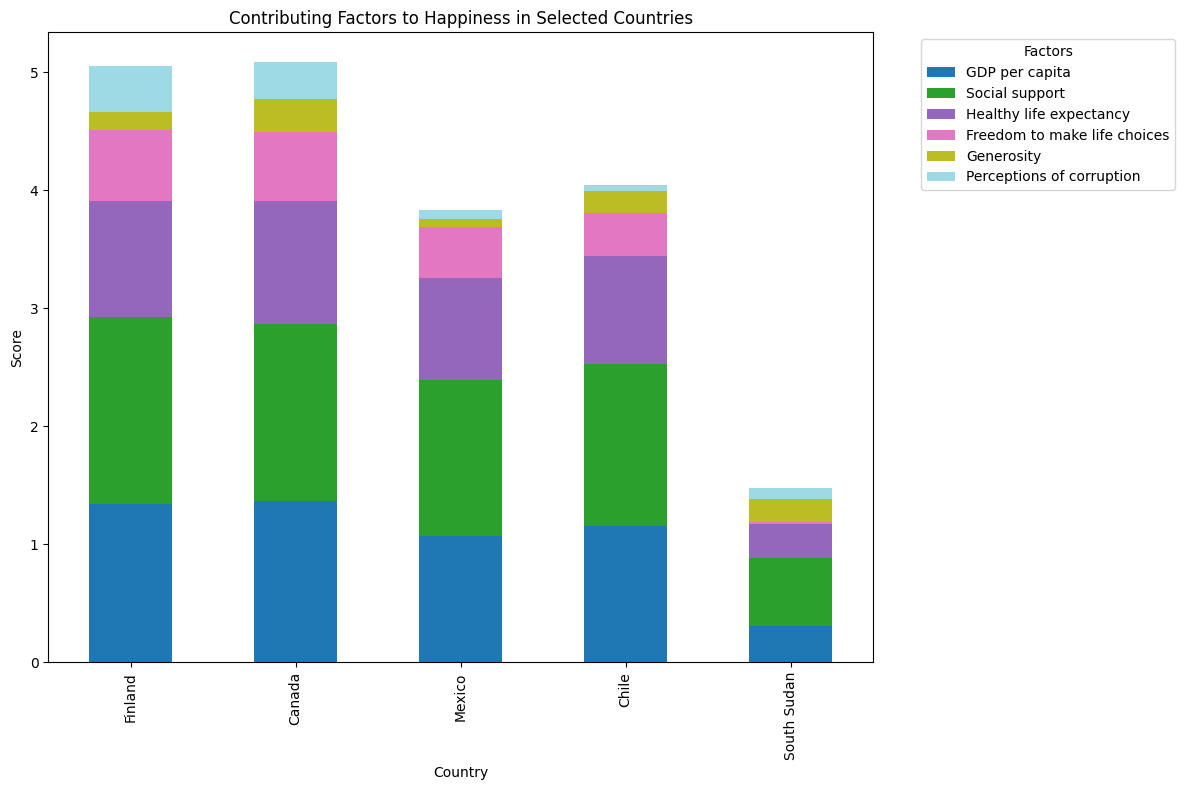

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# Filtramos los países deseados (el más feliz, el menos feliz, México y dos más)
countries = ['Finland', 'South Sudan', 'Mexico', 'Canada', 'Chile']
happiness_filtered = df1[df1['Country or region'].isin(countries)]

# Establecer 'Country or region' como índice
happiness_filtered.set_index('Country or region', inplace=True)

# Seleccionar los factores contribuyentes
factors = [
    'GDP per capita',
    'Social support',
    'Healthy life expectancy',
    'Freedom to make life choices',
    'Generosity',
    'Perceptions of corruption'
]

# Crear una nueva DataFrame solo con los factores
happiness_factors = happiness_filtered[factors]

# Crear la gráfica de barras apiladas
happiness_factors.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='tab20')

# Títulos y etiquetas
plt.title('Contributing Factors to Happiness in Selected Countries')
plt.xlabel('Country')
plt.ylabel('Score')
plt.legend(title='Factors', bbox_to_anchor=(1.05, 1), loc='upper left')

# Mostrar la gráfica
plt.tight_layout()
plt.show()


8.	Crea una matriz de subgráficas de 2 x 3 con scatter plots del puntaje (`score`) versus los 6 factores para determinar qué factor influye más en la evaluación.

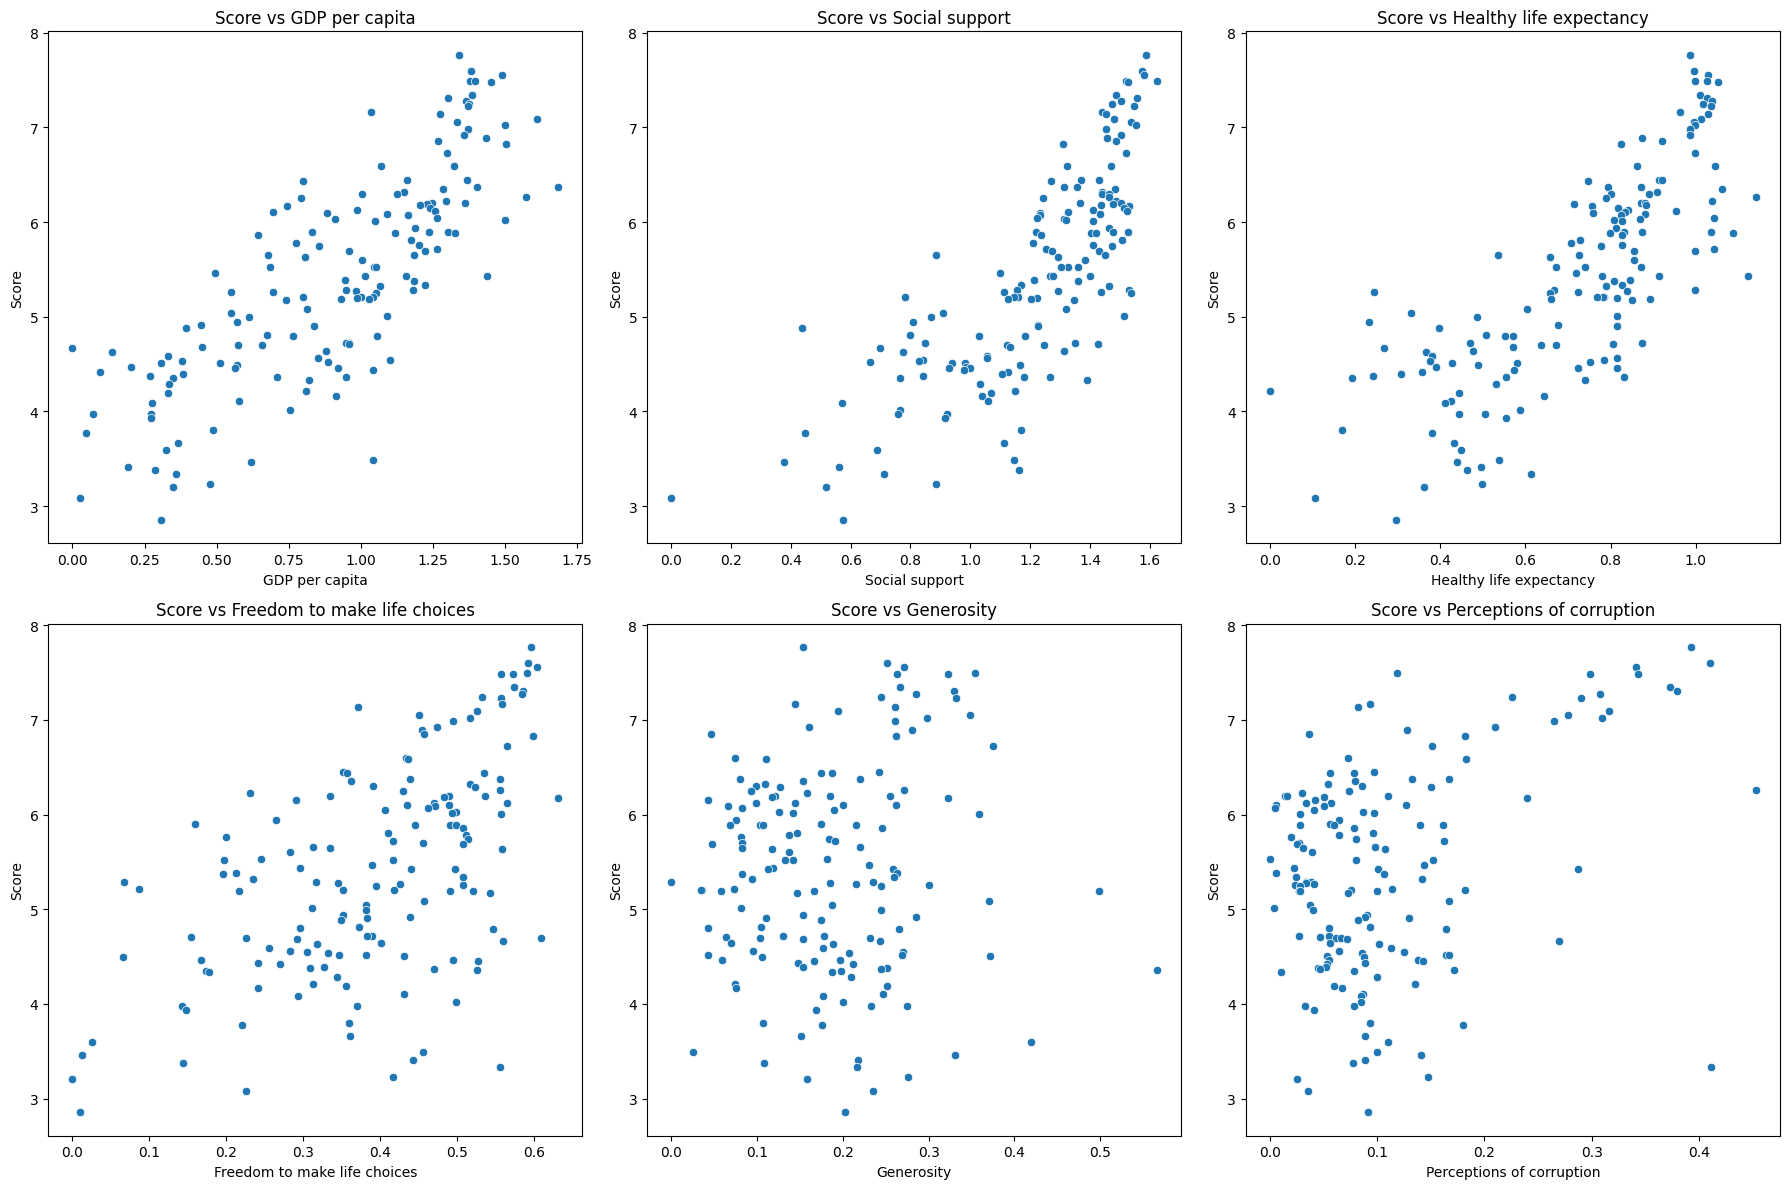

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Definir los factores que queremos analizar
factors = [
    'GDP per capita',
    'Social support',
    'Healthy life expectancy',
    'Freedom to make life choices',
    'Generosity',
    'Perceptions of corruption'
]

# Crear la figura y los ejes para la matriz de subgráficas
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()  # Convertir la matriz de ejes en un array 1D para facilitar la iteración

# Crear los scatter plots
for i, factor in enumerate(factors):
    sns.scatterplot(x=df1[factor], y=df1['Score'], ax=axes[i])
    axes[i].set_title(f'Score vs {factor}')
    axes[i].set_xlabel(factor)
    axes[i].set_ylabel('Score')

# Ajustar el layout
plt.tight_layout()
plt.show()


9.	Comprueba lo anterior con un heatmap donde incluyas los índices de correlación.

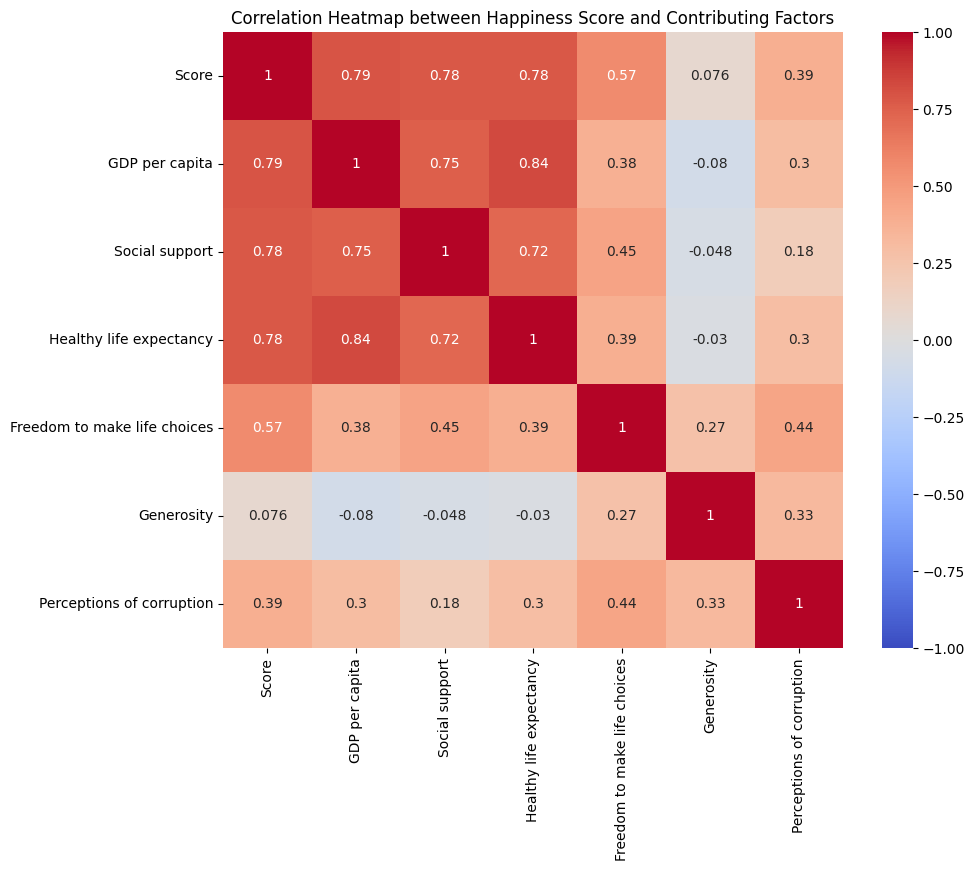

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Definir los factores que queremos analizar
factors = [
    'GDP per capita',
    'Social support',
    'Healthy life expectancy',
    'Freedom to make life choices',
    'Generosity',
    'Perceptions of corruption'
]

# Crear un nuevo DataFrame con los factores y el puntaje
data = df1[['Score'] + factors]

# Calcular la matriz de correlación
correlation_matrix = data.corr()

# Crear el heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap between Happiness Score and Contributing Factors')
plt.show()


10.	Combina con el dataframe `metada` (Metadata.csv) para graficar la felicidad promedio por región.

<ipython-input-34-d08932b8f12e>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Score', y='Region', data=average_happiness_by_region, palette='viridis')


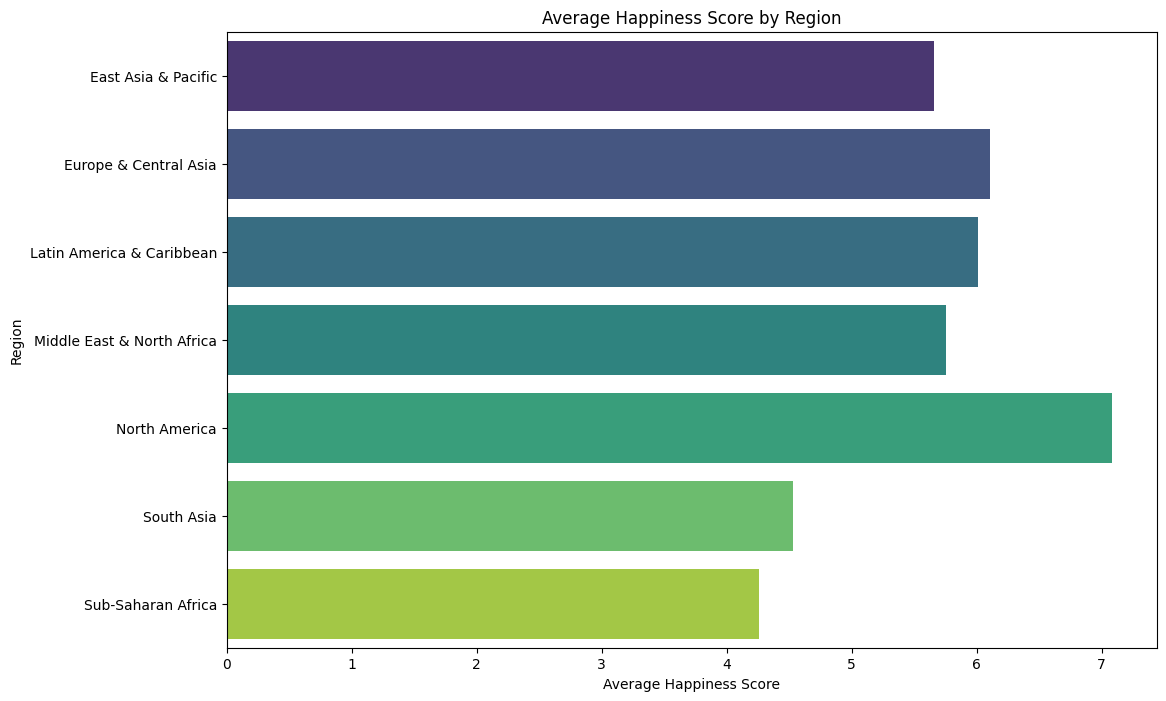

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar los datos
happiness = pd.read_csv("/content/sample_data/Happiness_report.csv")
metadata = pd.read_csv('/content/sample_data/Metadata.csv')

# Combinar los DataFrames en función de la columna 'Country or region'
combined_df = pd.merge(happiness, metadata, left_on='Country or region', right_on='TableName')

combined_df.to_csv("/content/sample_data/Combined.csv")


# Calcular la felicidad promedio por región
average_happiness_by_region = combined_df.groupby('Region')['Score'].mean().reset_index()

# Crear la gráfica de barras
plt.figure(figsize=(12, 8))
sns.barplot(x='Score', y='Region', data=average_happiness_by_region, palette='viridis')

# Títulos y etiquetas
plt.title('Average Happiness Score by Region')
plt.xlabel('Average Happiness Score')
plt.ylabel('Region')

# Mostrar la gráfica
plt.show()
